- [qiskit.circuit.library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
- [qiskit.quantum_info](https://docs.quantum.ibm.com/api/qiskit/quantum_info)
- [qiskit.visualization](https://docs.quantum.ibm.com/api/qiskit/visualization)

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp, Statevector, DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram

import numpy as np

# Single-Qubit Gates
- [XGate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.XGate)
$$
X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$
- [YGate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.YGate)
$$
Y = \begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
$$
- [ZGate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZGate)
$$
Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$
- [HGate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate)
$$
H = \dfrac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$
- [PhaseGate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseGate)
$$
P = \begin{bmatrix}
1 & 0 \\
0 & e^{i\theta}
\end{bmatrix}
$$

Statevector([4.32978028e-17+0.70710678j, 7.07106781e-01+0.j        ],
            dims=(2,))


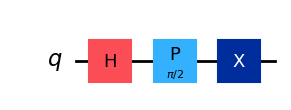

In [12]:
qc = QuantumCircuit(1)

#qc.x(0)

#qc.h(0)
#qc.z(0)

qc.h(0)
qc.p(np.pi/2, 0)
qc.x(0)

state = Statevector(qc)
print(state)
qc.draw("mpl")

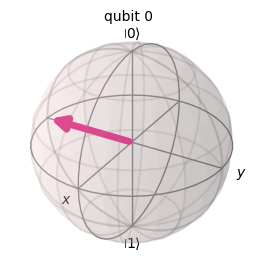

In [13]:
plot_bloch_multivector(state, figsize=[3,3])

## Rotations
$$
R_H(\theta) = e^{-i\frac{\theta}{2}H}
$$

Statevector([ 0.5+0.5j, -0.5+0.5j],
            dims=(2,))


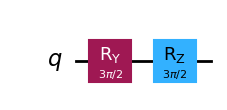

In [25]:
theta = 3*np.pi/2

qc = QuantumCircuit(1)

#qc.rx(theta, 0)
qc.ry(theta, 0)
qc.rz(theta, 0)

state = Statevector(qc)
print(state)
qc.draw("mpl")

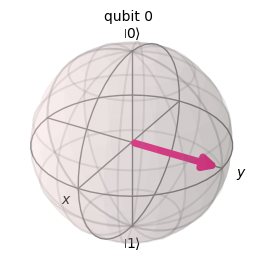

In [26]:
plot_bloch_multivector(state, figsize=[3,3])

# Multi-Qubit Circuits

## Bell State

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


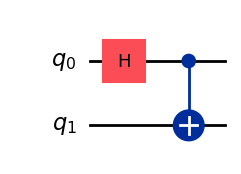

In [6]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)
print(state)
qc.draw("mpl")

In [7]:
array_to_latex(state)

<IPython.core.display.Latex object>

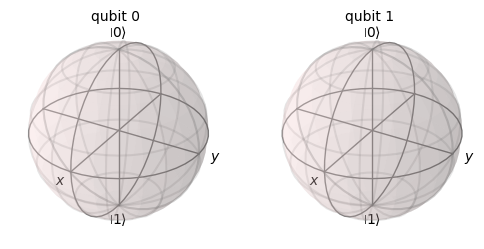

In [8]:
plot_bloch_multivector(state, figsize=[3,3])

## Controlled Phase
$$
P = \begin{bmatrix}
1 & 0 \\
0 & e^{i\theta}
\end{bmatrix}
$$

Statevector([0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
             7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2, 2))


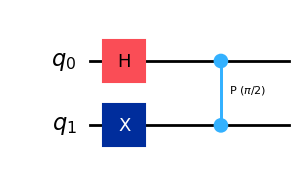

In [9]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cp(np.pi/2, 1, 0)

state = Statevector(qc)
print(state)
qc.draw("mpl")

In [10]:
array_to_latex(state)

<IPython.core.display.Latex object>

$\dfrac{1}{\sqrt{2}}(\ket{0}+i\ket{1})\ket{1}$

In [11]:
# Check purity
matrix = DensityMatrix(qc)
matrix0 = partial_trace(matrix, qargs=[1])
matrix0.purity()

np.complex128(0.9999999999999996+0j)

In [12]:
array_to_latex(matrix0)

<IPython.core.display.Latex object>

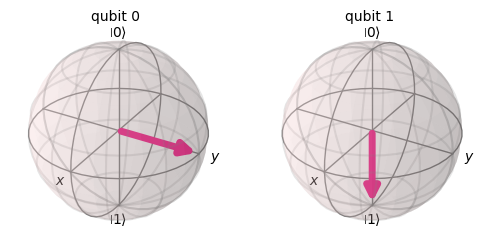

In [13]:
plot_bloch_multivector(state, figsize=[3,3])

## Mixed state

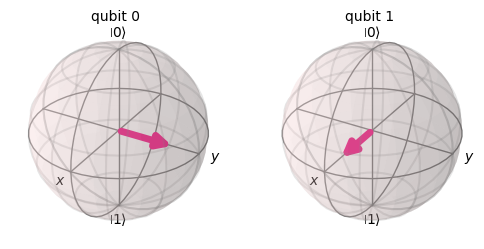

In [14]:
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.t(1) #phase pi/4
qc.s(0) #phase pi/2
qc.cx(0,1) 
 
state = Statevector(qc)
plot_bloch_multivector(state, figsize=[3,3])

In [15]:
state = Statevector(qc)
array_to_latex(state)

<IPython.core.display.Latex object>

In [16]:
matrix = DensityMatrix(qc)
array_to_latex(matrix)

<IPython.core.display.Latex object>

In [17]:
# Check purity
matrix = DensityMatrix(qc)
matrix0 = partial_trace(matrix, qargs=[1])

In [18]:
array_to_latex(matrix0)

<IPython.core.display.Latex object>

In [19]:
matrix0.purity()

np.complex128(0.7499999999999993+0j)

# Execution and Measurement
- [Primitives](https://docs.quantum.ibm.com/api/qiskit/0.35/primitives)
- [Transpiler](https://docs.quantum.ibm.com/api/qiskit/transpiler)
- [Experiment Results](https://docs.quantum.ibm.com/api/qiskit/result)

In [31]:
from qiskit.primitives import StatevectorSampler, StatevectorEstimator

## StatevectorSampler

In [32]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)
qc_measured = qc.measure_all(inplace=False)

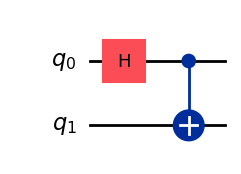

In [33]:
qc.draw("mpl")

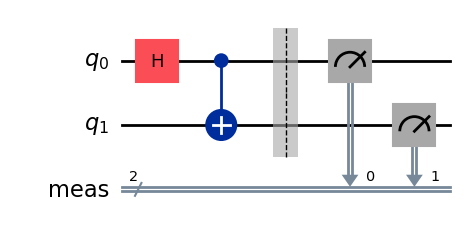

In [34]:
qc_measured.draw("mpl")

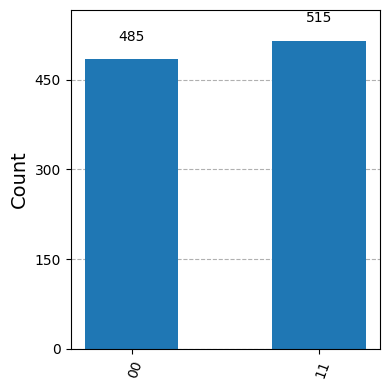

In [35]:
sampler = StatevectorSampler()
job = sampler.run([qc_measured], shots=1000)
result = job.result()
counts = result[0].data['meas'].get_counts()
plot_histogram(counts, figsize=(4,4))

## StatevectorEstimator
$H = -\frac{7}{8}*I \otimes I + \frac{3}{8}*Z \otimes I + \frac{3}{8}*I \otimes Z + \frac{1}{8}*Z\otimes Z$
$$
E(\ket{b_1 b_2}) = \bra{b_1 b_2}H\ket{b_1 b_2}
$$

In [39]:
Z = SparsePauliOp("Z")
I = SparsePauliOp("I")
Hamiltonian = (-(7/8)*I^I) + ((3/8)*Z^I) + ((3/8)*I^Z) + ((1/8)*Z^Z)
Hamiltonian


SparsePauliOp(['II', 'ZI', 'IZ', 'ZZ'],
              coeffs=[-0.875+0.j,  0.375+0.j,  0.375+0.j,  0.125+0.j])

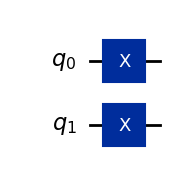

In [48]:
qc = QuantumCircuit(2)

qc.x(0)
qc.x(1)
qc.draw("mpl")


In [49]:
estimator = StatevectorEstimator()
job = estimator.run([(qc, Hamiltonian)], precision=1e-3)
result = job.result()
print(f" > Expectation values: {result[0].data.evs}")

 > Expectation values: -1.4997276847843695
